本文内容均选自[Numpy官方QuickStart](https://numpy.org/doc/stable/user/quickstart.html)

# 学习目标

After this tutorial, you should be able to:

- Understand the difference between one-, two- and n-dimensional arrays in NumPy;

- Understand how to apply some linear algebra operations to n-dimensional arrays without using for-loops;

- Understand axis and shape properties for n-dimensional arrays

# 基础

- NumPy’s main object：多维array，元素类型相同
- Numpy中dimensions are called axes,例,[1,2,1]一个axis，这个axis长度为3；[[1,0,0],[0,1,2]]有两个axes，第一个aixs长度为2，第二个aixs长度为3
- Numpy中的array类被称为ndarray，或者array。注意numpy.array和Standard Python Library中的array.array(只有一个维度)是不一样的。

In [39]:
np.array([1,'2'])

array(['1', '2'], dtype='<U11')

In [40]:
np.array([True,'你好'])

array(['True', '你好'], dtype='<U5')

In [33]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [38]:
np.array([[1,2],[3]])

array([list([1, 2]), list([3])], dtype=object)

In [43]:
np.array([[1,2],['2']])

array([list([1, 2]), list(['2'])], dtype=object)

## Attributes of an `ndarray` object

In [11]:
import numpy as np
a = np.arange(15).reshape(3,5)

In [12]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [13]:
a.shape

(3, 5)

In [14]:
a.ndim

2

In [19]:
a.dtype

dtype('int32')

In [20]:
a.dtype.name

'int32'

In [16]:
a.size

15

In [44]:
type(a)

numpy.ndarray

## Array Creation

普通构造：

In [48]:
import numpy as np
a = np.array([2,3,4]) # 注意np.array(2,3,4)是错误写法
a

array([2, 3, 4])

In [54]:
b = np.array([(1.5,2,3), (4,5,6)]) # 内部的()换成[]也可以
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

几种特殊构造：

In [58]:
np.zeros((3, 4))                   

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [57]:
np.ones( (2,3,4), dtype=np.int16 ) 

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [60]:
# initial content is random and 
# depends on the state of the memory
np.empty( (2,3) )  

array([[1.39069238e-309, 1.39069238e-309, 1.39069238e-309],
       [1.39069238e-309, 1.39069238e-309, 1.39069238e-309]])

In [64]:
np.arange(10, 30, 5) # 注意，包含10，不包含30

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [65]:
np.arange(0, 2, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [74]:
np.arange(4)

array([0, 1, 2, 3])

In [67]:
np.linspace(0,2,9) # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

## Basic Operations

简单运算

In [73]:
a = np.array([20,30,40,50])
b = np.arange(4)
b

array([0, 1, 2, 3])

In [76]:
c = a-b
c

array([20, 29, 38, 47])

In [78]:
b ** 2 # '**'是平方的意思

array([0, 1, 4, 9], dtype=int32)

In [79]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [82]:
a < 35

array([ True,  True, False, False])

矩阵乘法

In [85]:
A = np.array([[1,1],
              [0,1]])

B = np.array([[2,0],
              [3,4]])

A @ B

array([[5, 4],
       [3, 4]])

In [86]:
A.dot(B)

array([[5, 4],
       [3, 4]])

In [89]:
A * B # elementwise product

array([[2, 0],
       [0, 4]])

Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [128]:
# create instance of default random number generator
rg = np.random.default_rng(1) 
a = np.ones((2,3), dtype=int)
b = rg.random((2,3))
b

array([[0.51182162, 0.9504637 , 0.14415961],
       [0.94864945, 0.31183145, 0.42332645]])

In [129]:
a *=3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [130]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

In [132]:
# b is not automatically converted to integer type
# 写成 a= a+b 不会报错
a += b 

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.By default, these operations apply to the array as though it were a list of numbers, regardless of its shape

In [133]:
a = rg.random((2,3))
a

array([[0.82770259, 0.40919914, 0.54959369],
       [0.02755911, 0.75351311, 0.53814331]])

In [134]:
a.sum()

3.1057109529998157

In [135]:
a.min()

0.027559113243068367

In [136]:
a.max()

0.8277025938204418

However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [138]:
b = np.arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [139]:
# 对列求和
b.sum(axis=0)

array([12, 15, 18, 21])

In [140]:
# 每一行的最小值
b.min(axis=1)

array([0, 4, 8])

In [142]:
# cumulative sum along each row
b.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]], dtype=int32)

## Universal Function 

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [143]:
B = np.arange(3)
B

array([0, 1, 2])

In [144]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [145]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [146]:
C = np.array([2.,-1.,4.])

In [147]:
np.add(B,C)

array([2., 0., 6.])

## Indexing, Slicing and Iterating

一维

In [150]:
a = np.arange(10) ** 3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [151]:
a[2]

8

In [162]:
a[-1]

729

In [152]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [163]:
a[5:2]

array([], dtype=int32)

In [165]:
a[-2:]

array([512, 729], dtype=int32)

In [154]:
a[0:6:2]

array([ 0,  8, 64], dtype=int32)

In [156]:
a[:6:2]

array([ 0,  8, 64], dtype=int32)

In [158]:
# reverse a
a[::-1]

array([729, 512, 343, 216, 125,  64,  27,   8,   1,   0], dtype=int32)

In [169]:
for i in a:
    print(i**(1/3.))

0.0
1.0
2.0
3.0
3.9999999999999996
5.0
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


多维

In [171]:
def f(x,y):
    return 10*x+y

# np.fromfunction:Construct an array by 
# executing a function over each coordinate
b = np.fromfunction(f,(5,4),dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [172]:
b[2,3]

23

In [173]:
b[0:5,1]

array([ 1, 11, 21, 31, 41])

In [174]:
b[:,1]

array([ 1, 11, 21, 31, 41])

In [175]:
b[1:3,:]

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

In [178]:
# Equivalent to b[-1,:],b[-1,...]
b[-1]

array([40, 41, 42, 43])

The expression within brackets in b[i] is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as b[i,...].

The dots (...) represent as many colons as needed to produce a complete indexing tuple. For example, if x is an array with 5 axes, then

- x[1,2,...] is equivalent to x[1,2,:,:,:],

- x[...,3] to x[:,:,:,:,3] and

- x[4,...,5,:] to x[4,:,:,5,:].

In [180]:
c = np.array( [[[  0,  1,  2],               # a 3D array (two stacked 2D arrays)
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,113]]])
c.shape

(2, 2, 3)

In [185]:
c[1,...] # same as c[1,:,:]

array([[100, 101, 102],
       [110, 112, 113]])

In [186]:
c[...,2] # same as c[:,:,2]

array([[  2,  13],
       [102, 113]])

Iterating over multidimensional arrays is done with respect to the first axis:

In [187]:
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [188]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However, if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array:

In [189]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


# Shape Manipulation

## Changing the shape of an array

In [190]:
a = np.floor(10*rg.random((3,4)))
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [191]:
a.shape

(3, 4)

In [195]:
# returns the array, flattened
a.ravel()

array([3., 7., 3., 4., 1., 4., 2., 2., 7., 2., 4., 9.])

In [197]:
# returns the array with a modified shape
a.reshape(6,2)

array([[3., 7.],
       [3., 4.],
       [1., 4.],
       [2., 2.],
       [7., 2.],
       [4., 9.]])

In [198]:
a.T

array([[3., 1., 7.],
       [7., 4., 2.],
       [3., 2., 4.],
       [4., 2., 9.]])

In [200]:
a.T.shape

(4, 3)

In [201]:
a.shape

(3, 4)

The reshape function returns its argument with a modified shape, whereas the ndarray.resize method modifies the array itself:

In [202]:
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [203]:
a.resize((2,6))

In [204]:
a

array([[3., 7., 3., 4., 1., 4.],
       [2., 2., 7., 2., 4., 9.]])

The reshape function returns its argument with a modified shape, whereas the ndarray.resize method modifies the array itself:

In [205]:
a.reshape(3,-1)

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

## Stacking together different arrays

In [207]:
a = np.floor(10*rg.random((2,2)))
a

array([[1., 9.],
       [5., 1.]])

In [209]:
b = np.floor(10*rg.random((2,2)))
b

array([[6., 7.],
       [6., 9.]])

In [210]:
np.vstack((a,b))

array([[1., 9.],
       [5., 1.],
       [6., 7.],
       [6., 9.]])

In [211]:
np.hstack((a,b))

array([[1., 9., 6., 7.],
       [5., 1., 6., 9.]])

The function column_stack stacks 1D arrays as columns into a 2D array. It is equivalent to hstack only for 2D arrays:

In [214]:
from numpy import newaxis
np.column_stack((a,b))

array([[1., 9., 6., 7.],
       [5., 1., 6., 9.]])

In [215]:
a = np.array([4.,2.])
b = np.array([3.,8.])
np.column_stack((a,b))

array([[4., 3.],
       [2., 8.]])

In [217]:
np.hstack((a,b)) # the result is different

array([4., 2., 3., 8.])

In [219]:
a

array([4., 2.])

In [218]:
a[:,newaxis]

array([[4.],
       [2.]])

In [221]:
np.column_stack((a[:newaxis],b[:,newaxis]))

array([[4., 3.],
       [2., 8.]])

In [222]:
np.hstack((a[:,newaxis],b[:,newaxis])) # the result is the same

array([[4., 3.],
       [2., 8.]])

On the other hand, the function `row_stack` is equivalent to `vstack` for any input arrays. In fact, `row_stack` is an alias for `vstack`:

In [223]:
np.column_stack is np.hstack

False

In [224]:
np.row_stack is np.vstack

True

In general, for arrays with more than two dimensions, `hstack` stacks along their second axes, `vstack` stacks along their first axes, and `concatenate` allows for an optional arguments giving the number of the axis along which the concatenation should happen.

In complex cases, `r_` and `c_ `are useful for creating arrays by stacking numbers along one axis.

In [225]:
np.r_[1:4,0,4]

array([1, 2, 3, 0, 4])

In [227]:
a

array([4., 2.])

In [229]:
np.c_[a,[0,1]]

array([[4., 0.],
       [2., 1.]])

## Splitting one array into several smaller ones

In [230]:
a = np.floor(10*rg.random((2,12)))
a

array([[0., 5., 4., 0., 6., 8., 5., 2., 8., 5., 5., 7.],
       [1., 8., 6., 7., 1., 8., 1., 0., 8., 8., 8., 4.]])

In [231]:
# Split into 3
np.hsplit(a,3)

[array([[0., 5., 4., 0.],
        [1., 8., 6., 7.]]),
 array([[6., 8., 5., 2.],
        [1., 8., 1., 0.]]),
 array([[8., 5., 5., 7.],
        [8., 8., 8., 4.]])]

In [232]:
# Split a after the third and the fourth column
np.hsplit(a,(3,4))

[array([[0., 5., 4.],
        [1., 8., 6.]]),
 array([[0.],
        [7.]]),
 array([[6., 8., 5., 2., 8., 5., 5., 7.],
        [1., 8., 1., 0., 8., 8., 8., 4.]])]

`vsplit` splits along the vertical axis, and `array_split` allows one to specify along which axis to split.

# Copies and Views

## No Copy at All

In [233]:
# no new object is created
# a and b are two names for the same ndarray object
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11]])
b=a
b is a

True

## View or Shallow Copy

In [237]:
c = a.view()
c is a

False

In [239]:
# c is a view of the data owned by a
c.base is a

True

In [244]:
c = c.reshape((2,6)) # a's shape doesn't change
a.shape

(3, 4)

In [246]:
c[0,4] =1234 # a's data 

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

Slicing an array returns a view of it:

In [248]:
s = a[:,1:3]
s

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [250]:
# s[:] is a view of s.
s[:] = 10

In [251]:
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

## Deep Copy

In [252]:
# a new array object with new data is created
d = a.copy()
d is a

False

In [253]:
# d doesn't share anything with a
d.base is a

False

In [254]:
d[0,0]=9999
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

Sometimes copy should be called after slicing if the original array is not required anymore. For example, suppose a is a huge intermediate result and the final result b only contains a small fraction of a, a deep copy should be made when constructing b with slicing:

In [255]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a  # the memory of ``a`` can be released.

If b = a[:100] is used instead, a is referenced by b and will **persist in memory** even if del a is executed.

# Linear Algebra

In [258]:
import numpy as np
a = np.array([[1.0,2.0],[3.0,4.0]])
print(a)

[[1. 2.]
 [3. 4.]]


In [259]:
a.transpose()

array([[1., 3.],
       [2., 4.]])

In [260]:
np.linalg.inv(a) # inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [263]:
u = np.eye(2) # unit 2x2 matrix;"eye" represents "I"
u

array([[1., 0.],
       [0., 1.]])

In [265]:
np.trace(u) # trace

2.0

In [266]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

# Tricks and Tips

## Automatic Reshaping

In [270]:
a = np.arange(30)
b = a.reshape((2,-1,3)) # -1 means "whatever is needed"
b.shape

(2, 5, 3)

In [271]:
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

## Histograms

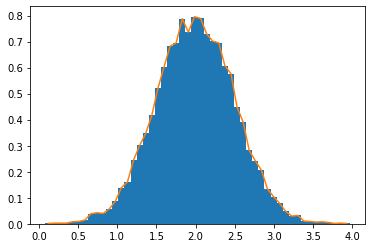

In [294]:
import numpy as np
rg = np.random.default_rng(1)

import matplotlib.pyplot as plt

mu, sigma = 2,0.5
v = rg.normal(mu,sigma,10000)

# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=1) # matplotlib version(plot)

# Compute the histogram with numpy and then plot it
# bins是bins的横坐标，n是高度
(n,bins) = np.histogram(v, bins=50, density=True) # Numpy version(no plot)

plt.plot(.5*(bins[1:]+bins[:-1]),n)